In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Primero definiremos las propiedades de un anillo. En principio es masa y radio del anillo, pero añadiremos un número que indica cuantos puntos tiene el anillo. No será un anillo continuo

In [2]:
class anillo():
    def __init__(self):
        self.masa   = None   # masa del anillo
        self.radio  = None   # radio del anillo
        self.numero = None   # numero de puntos
        self.xcoord = None   # coordenadas x de cada punto 
        self.ycoord = None   # coordenadas y de cada punto
    def crear(self):
        # una vez conocido el numero de puntos se crea cada punto del anillo
        angulo = np.linspace(0,2*np.pi,self.numero+1)[:-1]
        self.xcoord = self.radio*np.cos(angulo)
        self.ycoord = self.radio*np.sin(angulo)
        self.masas  = self.masa/self.numero       # masa de cada punto   

Antes de continuar debemos definir la aceleración que produce el anillo sobre el satelite. Usaremos la ley de Newton:

$\vec{a}_0=-\dfrac{ G m_{1}}{\vert\vec{r}_0-\vec{r}_1\vert^3} (\vec{r}_0-\vec{r}_1)$

Esta es la aceleracion que siente el objeto 0 debido a un objeto 1 escrita en forma de vector. $\vec{r}_1$ es la posición del objeto 0 y $\vec{r}_1$ la del objeto 1. $\vert\vec{r}_0-\vec{r}_1\vert$ es la distancia entre ambos puntos

$\vec{r_0}=(x_0,y_0,z_0)$

$\vec{r_1}=(x_1,y_1,z_1)$

$\vert\vec{r}_0-\vec{r}_1\vert = \sqrt{(x_0-x_1)^2 + (y_0 - y_1)^2 + (z_0-z_1)^2}=D$

Llamaremos $D_{0,1}$ a $\vert\vec{r}_0-\vec{r}_1\vert$ y así la aceleración en cada eje es:

$a_{x0}=-\dfrac{ G m_{1}}{D_{0,1}^3} (x_0-x_1)$

$a_{y0}=-\dfrac{ G m_{1}}{D_{0,1}^3} (y_0-y_1)$

$a_{z0}=-\dfrac{ G m_{1}}{D_{0,1}^3} (z_0-z_1)$

Segundo elegiremos que $G=1$. Tal vez se pregunten si se puede elegir y la verdad es que si, dependiendo de las unidades que definan. Por ejemplo conocemos $G$ como $6.67408\times 10^{-11} \rm \  m^3\ kg ^{-1}\ s^{-2}$. Pero si elegimos otras unidades como por ejemplo UA (unidad astronómica), año y $M_{\odot}$ (masa solar) $G=1\ \rm  UA^3 \ M_{\odot}^{-1}\ año^{-2}$

Las ecuaciones sólo serán:


$a_{x0}=-\dfrac{ m_{1}}{D_{0,1}^3} (x_0-x_1)$

$a_{y0}=-\dfrac{ m_{1}}{D_{0,1}^3} (y_0-y_1)$

$a_{z0}=-\dfrac{ m_{1}}{D_{0,1}^3} (z_0-z_1)$

Finalmente el anillo estará compuesto por un número N de puntos, así que hay que sumar la aceleración provocada por cada uno:


$a_{x0}=-\dfrac{ m_{1}}{D_{0,1}^3} (x_0-x_1)-\dfrac{ m_{2}}{D_{0,2}^3} (x_0-x_2) -... = -\sum_{i=1}^N \dfrac{ m_{i}}{D_{0,i}^3} (x_0-x_i)$

$a_{y0}=-\dfrac{ m_{1}}{D_{0,1}^3} (y_0-y_1)-\dfrac{ m_{2}}{D_{0,2}^3} (y_0-y_2) -...= -\sum_{i=1}^N \dfrac{ m_{i}}{D_{0,i}^3} (y_0-y_i)$

$a_{z0}=-\dfrac{ m_{1}}{D_{0,1}^3} (z_0-z_1)-\dfrac{ m_{2}}{D_{0,2}^3} (z_0-z_2) -...= -\sum_{i=1}^N \dfrac{ m_{i}}{D_{0,i}^3} (z_0-z_i)$



Ahora definimos las propiedades del satélite o luna que se mueve alrededor. Lo útil es tener guardadas la posición, velocidad y aceleración del objeto

In [3]:
class satelite():
    def __init__(self):
        self.masa = None    # masa (no necesitaremos realmente este dato)
        self.x = None       # posicion x
        self.y = None       # posicion y
        self.z = None       # posicion z
        self.vx = None      # velocidad eje x
        self.vy = None      # velocidad eje x
        self.vz = None      # velocidad eje x
        self.ini = None     # aqui guardaremos los datos iniciales si queremos
        
    def aceleracion(self,masa,xcoord,ycoord):
        dx = self.x-xcoord
        dy = self.y-ycoord
        dz = self.z
        dl = np.sqrt(dx**2+dy**2+dz**2)

        self.ax = np.sum(-masa*dx/dl**3)
        self.ay = np.sum(-masa*dy/dl**3)
        self.az = np.sum(-masa*dz/dl**3)
        
    def velocidad(self,dt):
        self.vx+=self.ax*dt
        self.vy+=self.ay*dt
        self.vz+=self.az*dt
        
    def mover(self,dt):
        self.x+=self.vx*dt
        self.y+=self.vy*dt
        self.z+=self.vz*dt
        
    def saved(self):
        self.ini=[self.x,self.y,self.z,
                  self.vx,self.vy,self.vz]
        
    def restart(self):
        self.x  = self.ini[0]
        self.y  = self.ini[1]
        self.z  = self.ini[2]
        self.vx = self.ini[3]
        self.vy = self.ini[4]
        self.vz = self.ini[5]

In [4]:
def run(luna,planeta,dt,N):
    luna.aceleracion(planeta.masas,planeta.xcoord,planeta.ycoord)
    luna.velocidad(0.5*dt)
    xa=[]
    ya=[]
    za=[]

    for i in range(N):
        xa.append(luna.x)
        ya.append(luna.y)
        za.append(luna.z)

        luna.mover(dt)
        luna.aceleracion(planeta.masas,planeta.xcoord,planeta.ycoord)
        luna.velocidad(dt)
    return xa,ya,za

In [5]:
planeta = anillo()
planeta.masa = 1
planeta.radio = 1
planeta.numero = 1

In [6]:
planeta.crear()

In [7]:
luna=satelite()
luna.masa=0.1
luna.x=0
luna.y=0
luna.z=0
luna.vx=0
luna.vy=1
luna.vz=0

<IPython.core.display.Javascript object>


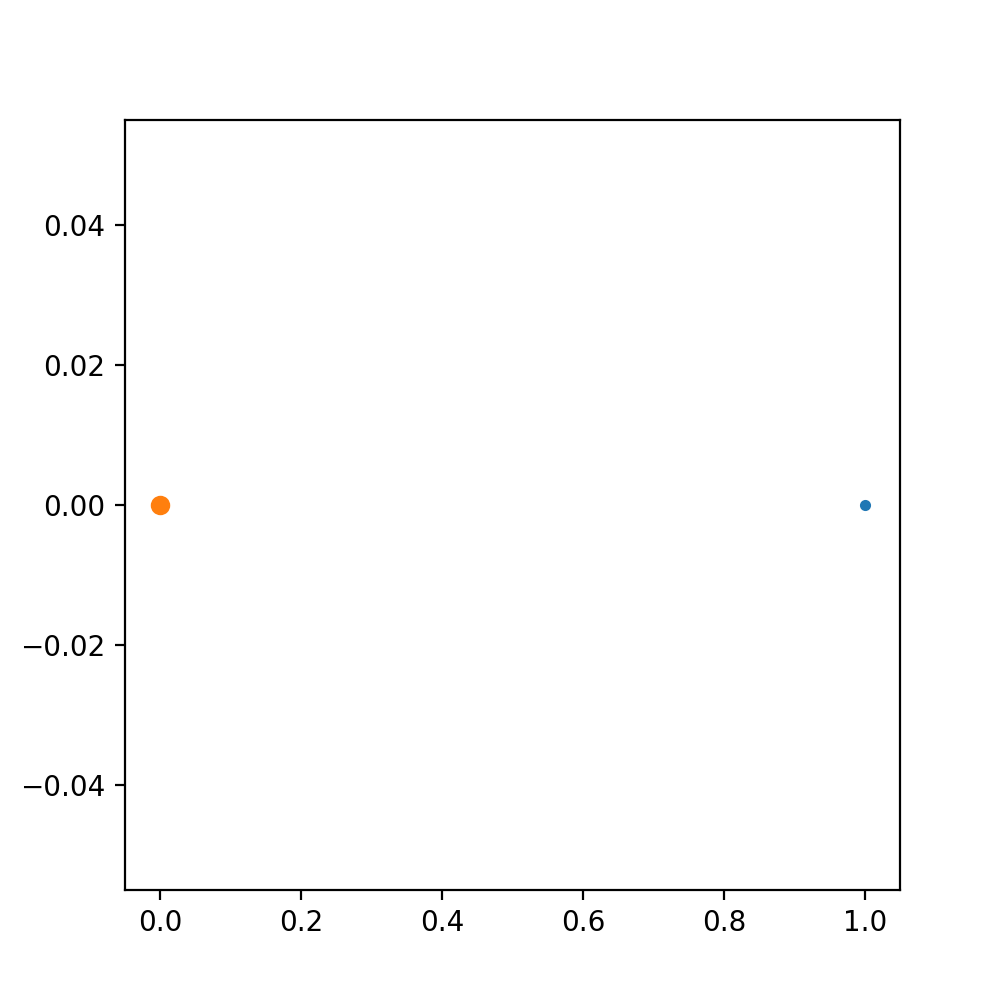

In [8]:
plt.figure(figsize=(5,5))
plt.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')
plt.plot(luna.x,luna.y,marker='o')

In [9]:
xa,ya,za=run(luna,planeta,dt=0.1,N=1000)

<IPython.core.display.Javascript object>


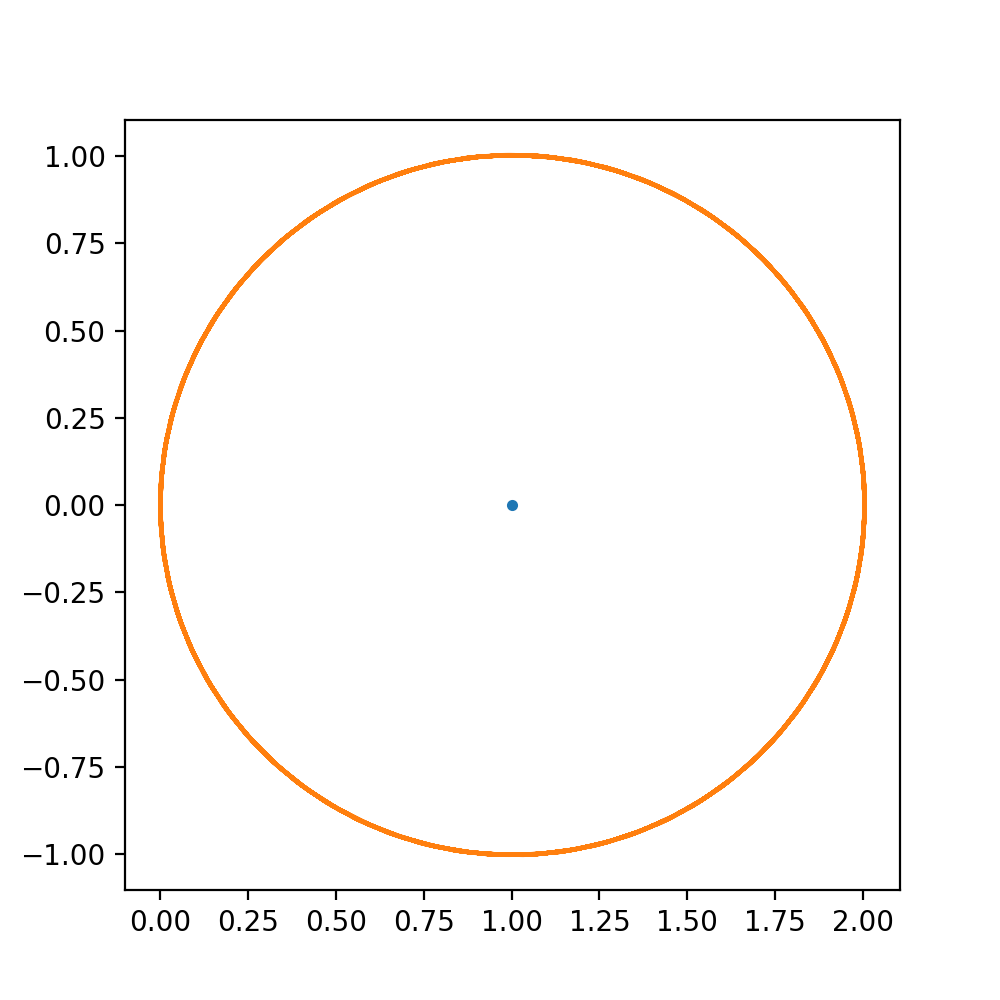

In [10]:
plt.figure(figsize=(5,5))
plt.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')
plt.plot(xa,ya)

In [127]:
planeta.numero = 5
planeta.crear()

luna.masa=0.1
luna.x=2
luna.y=0.004
luna.z=0
luna.vx=0
luna.vy=0
luna.vz=0.4



<IPython.core.display.Javascript object>


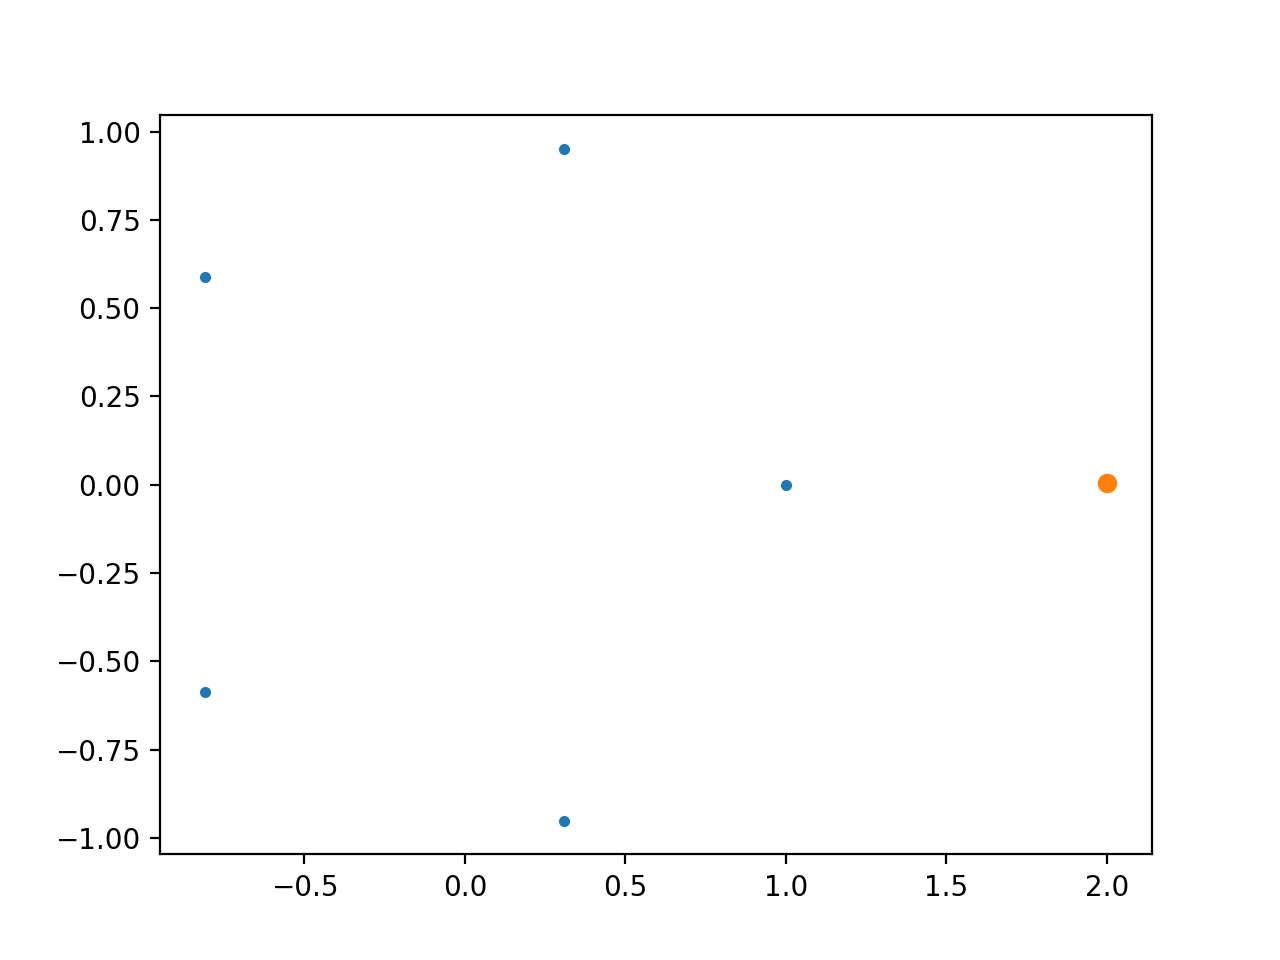

In [128]:
plt.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')
plt.plot(luna.x,luna.y,marker='o')


In [129]:
luna.saved()

In [130]:
luna.restart()

In [131]:
xa,ya,za=run(luna,planeta,dt=0.01,N=4000)


<IPython.core.display.Javascript object>


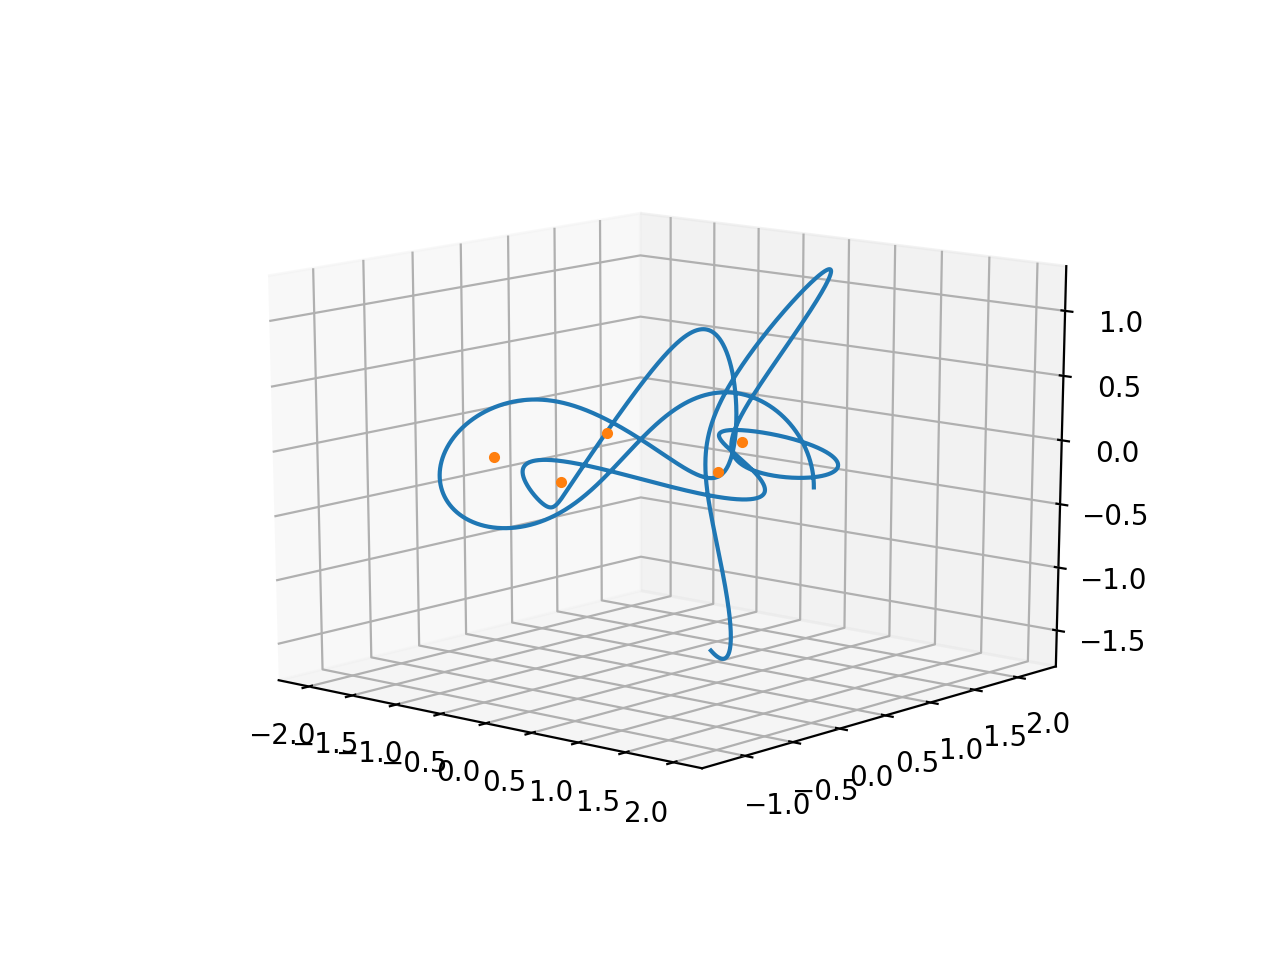

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')




In [133]:
planeta.numero = 100
planeta.crear()

luna.masa=0.1
luna.x=2
luna.y=0.04
luna.z=0
luna.vx=0
luna.vy=0
luna.vz=0.4

<IPython.core.display.Javascript object>


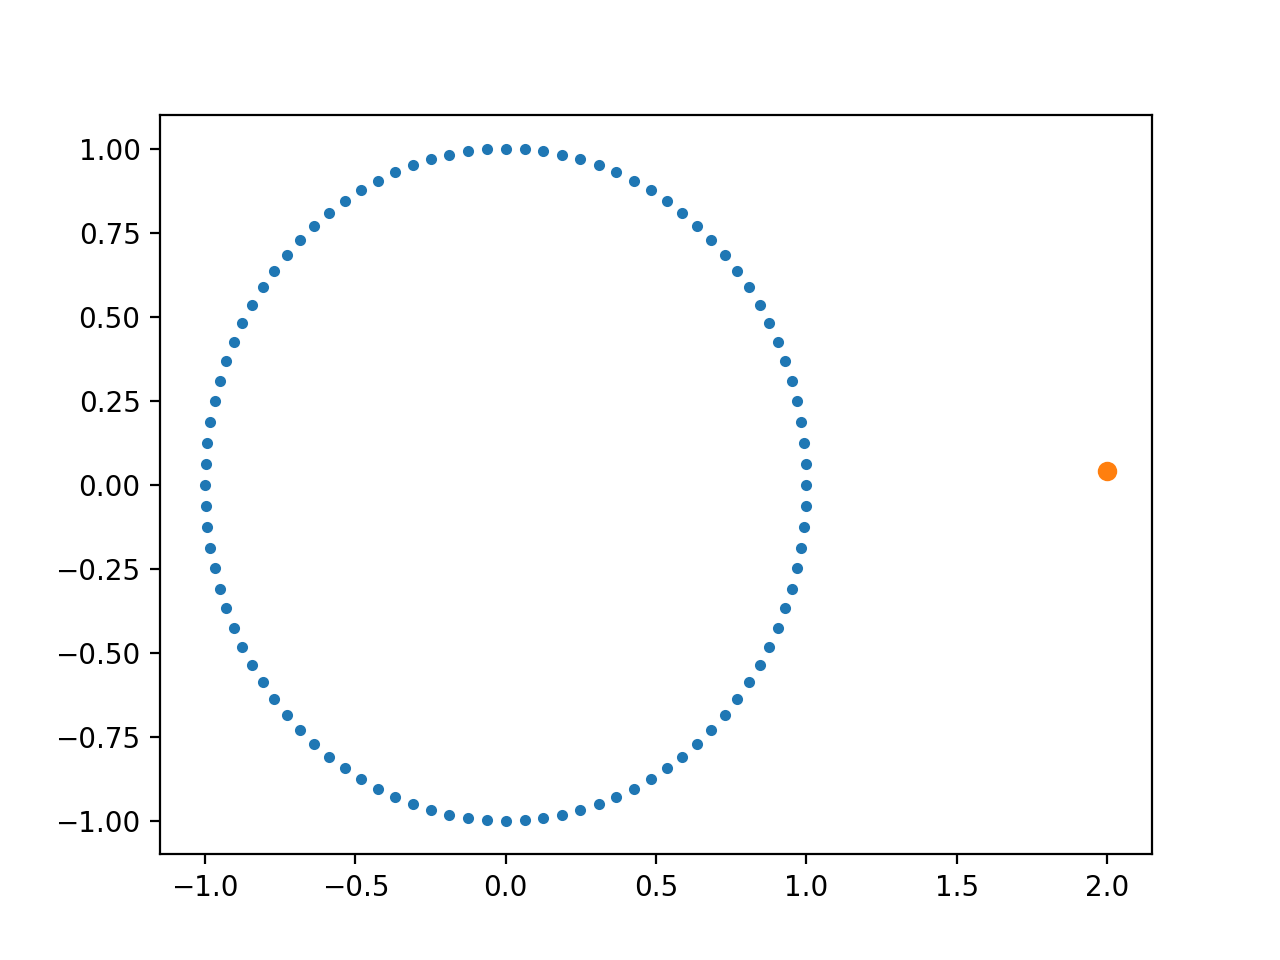

In [134]:
plt.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')
plt.plot(luna.x,luna.y,marker='o')



In [135]:
luna.saved()

In [136]:
luna.restart()

In [137]:
xa,ya,za=run(luna,planeta,dt=0.1,N=1500)

<IPython.core.display.Javascript object>


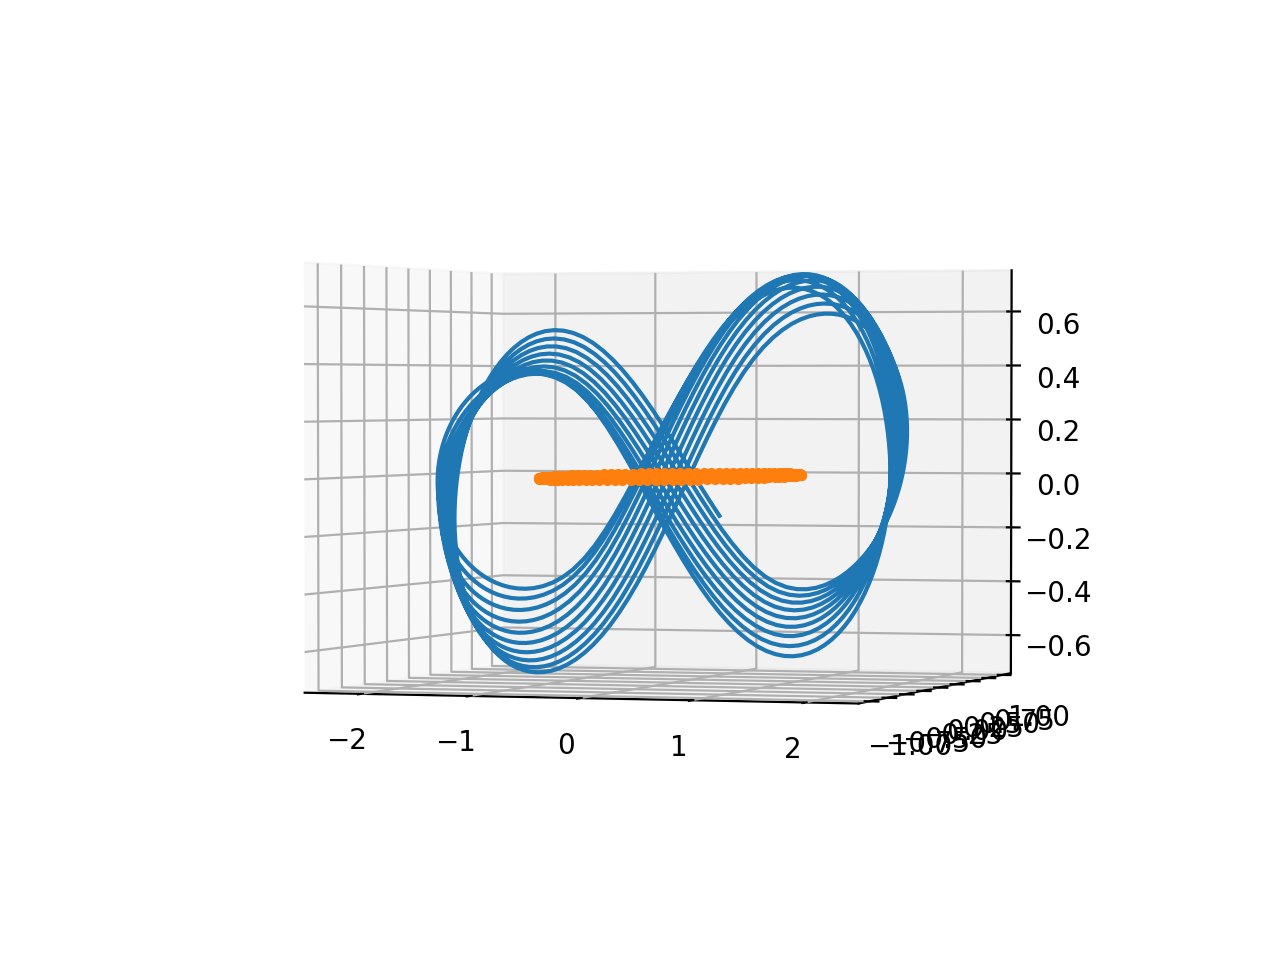

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')




In [139]:
planeta.numero = 200
planeta.crear()

luna.masa=0.1
luna.x=2
luna.y=0.04
luna.z=0
luna.vx=0
luna.vy=0
luna.vz=0.4

In [140]:
luna.saved()

In [141]:
luna.restart()

In [142]:
xa,ya,za=run(luna,planeta,dt=0.1,N=1500)

<IPython.core.display.Javascript object>


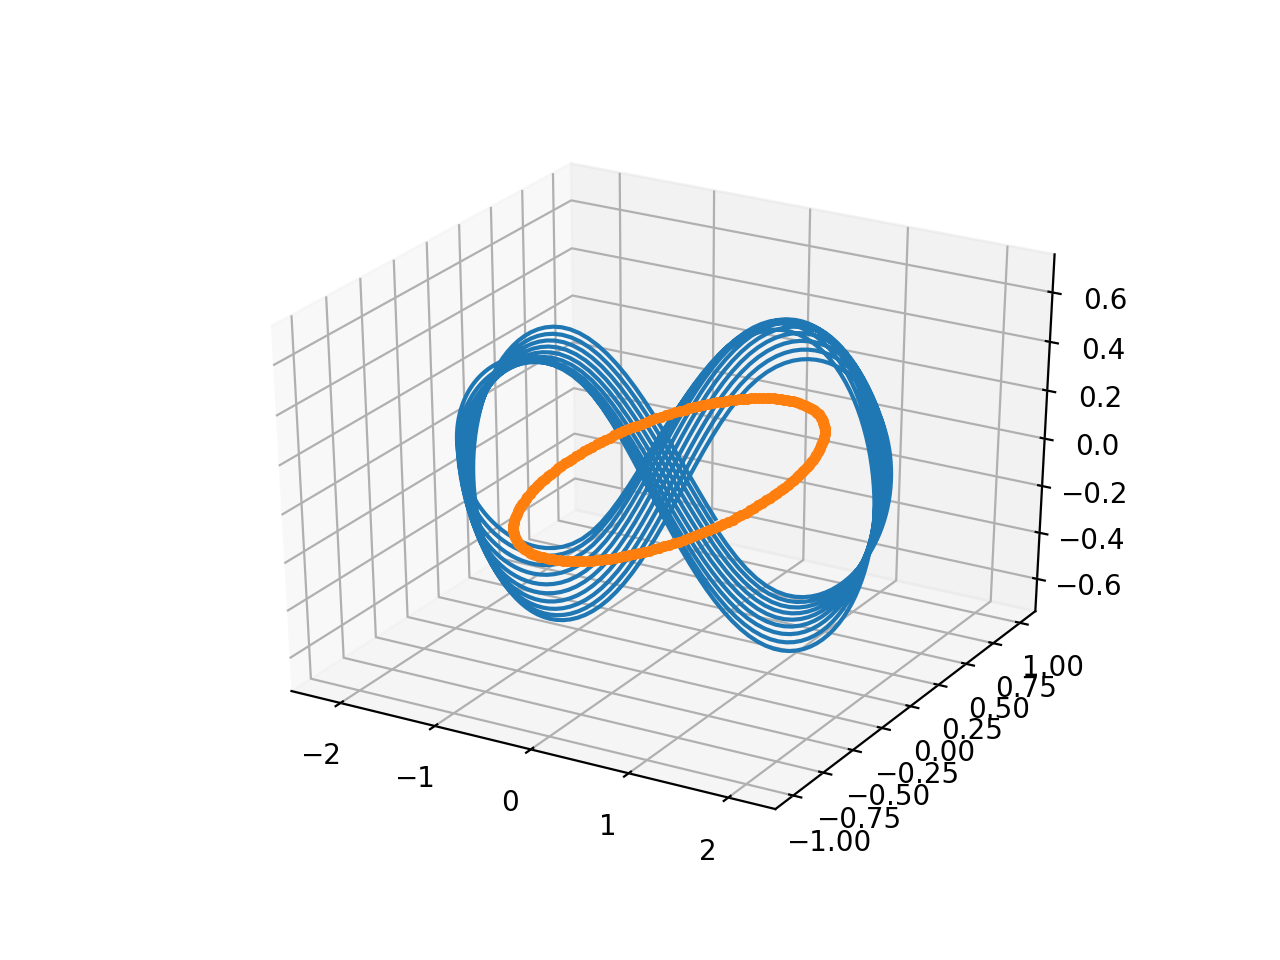

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')



In [307]:
planeta.numero = 200
planeta.crear()

vo=0.597
angulo=np.pi/4

luna.x=0
luna.y=0
luna.z=0
luna.vx=vo*np.sin(angulo)
luna.vy=0
luna.vz=vo*np.cos(angulo)

In [308]:
luna.saved()

In [309]:
luna.restart()

In [310]:
xa,ya,za=run(luna,planeta,dt=0.1,N=5000)

<IPython.core.display.Javascript object>


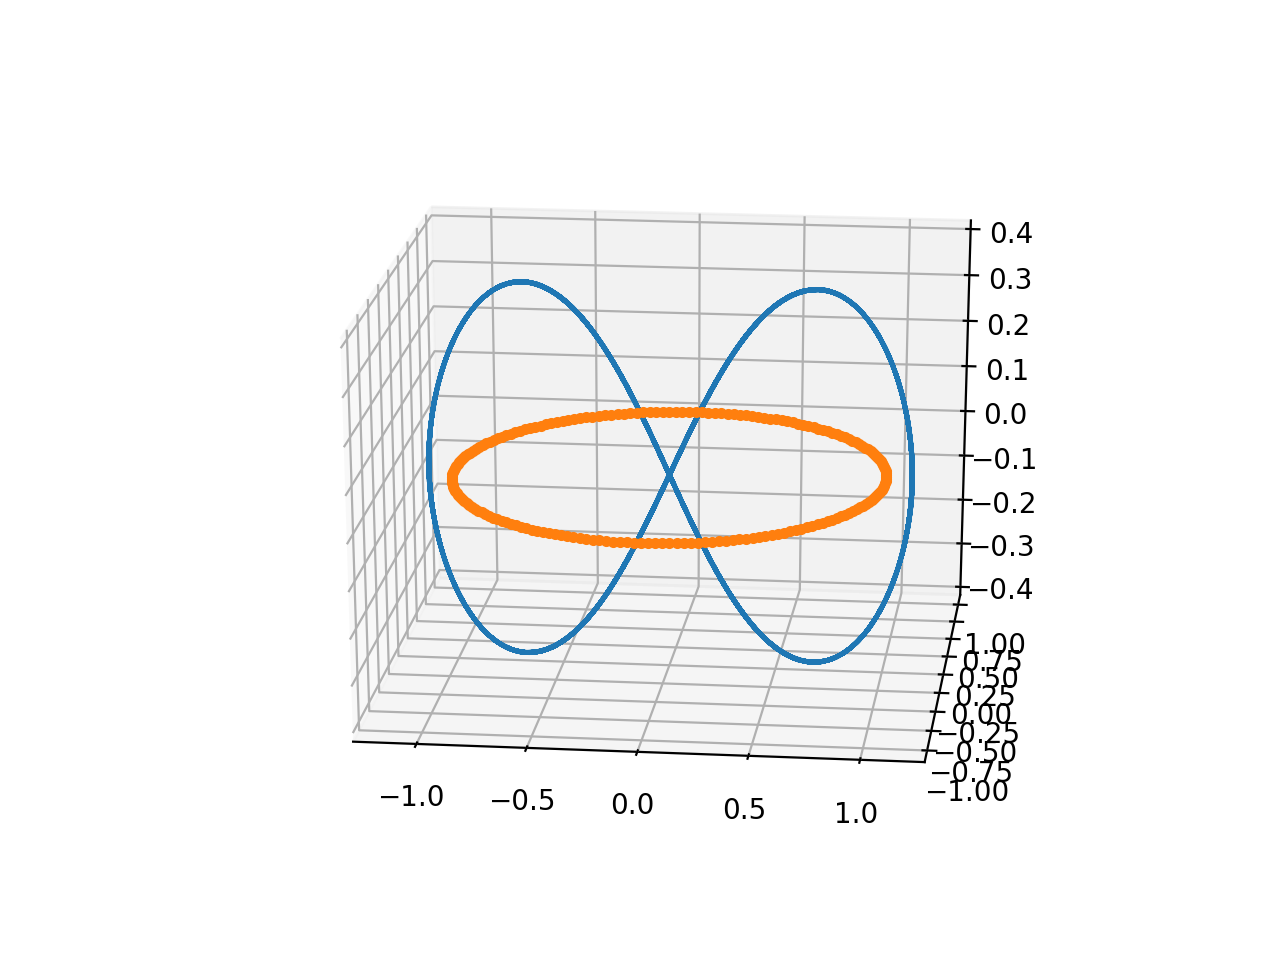

In [311]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')


In [337]:
planeta.numero = 200
planeta.crear()

vo=1.15
angulo=np.pi/4

luna.x=0
luna.y=0
luna.z=0
luna.vx=vo*np.sin(angulo)
luna.vy=0
luna.vz=vo*np.cos(angulo)

In [338]:
luna.saved()

In [339]:
luna.restart()

<IPython.core.display.Javascript object>


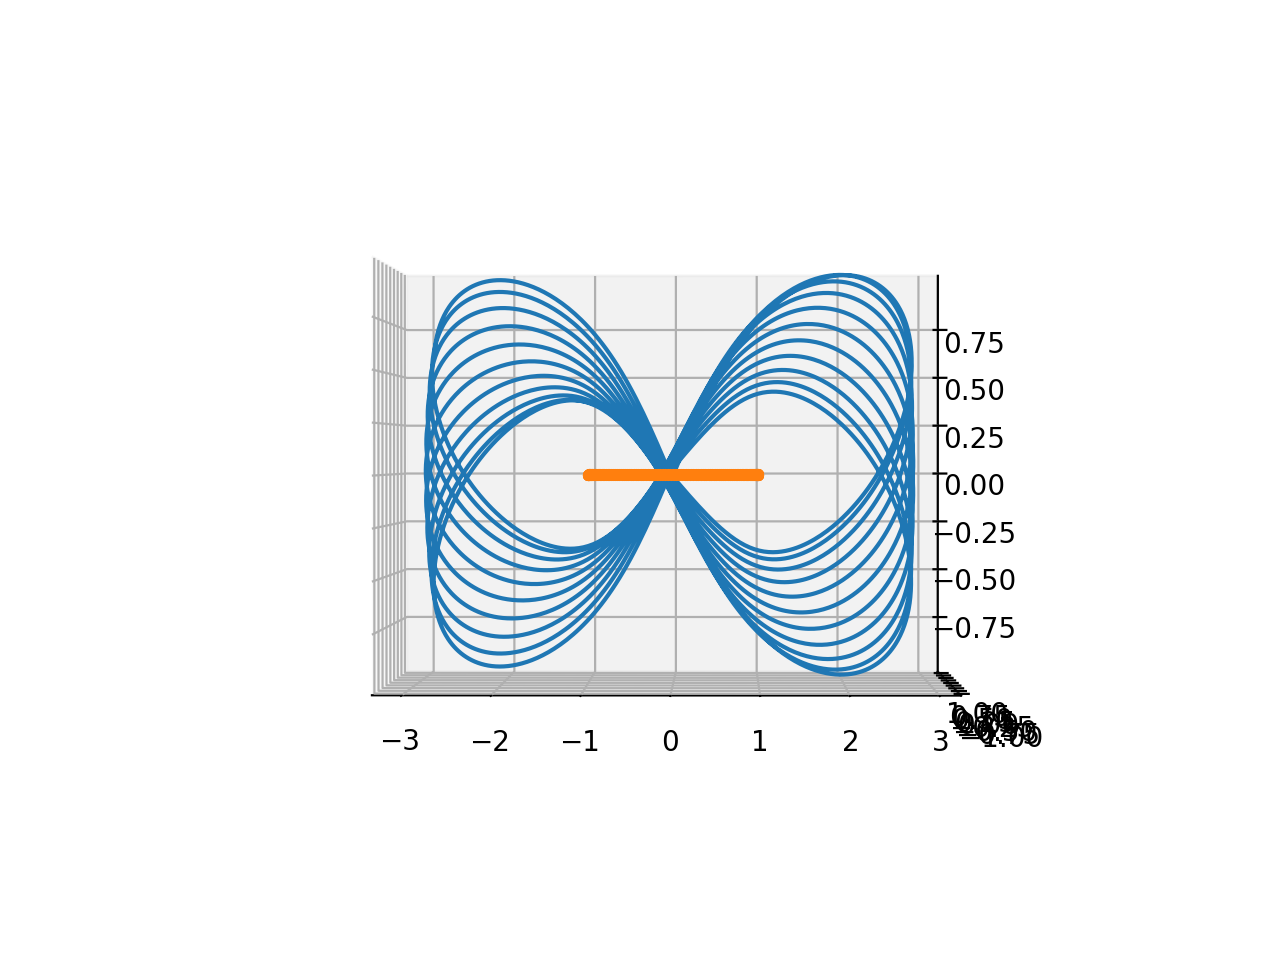

In [340]:
xa,ya,za=run(luna,planeta,dt=0.05,N=5000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')

<IPython.core.display.Javascript object>


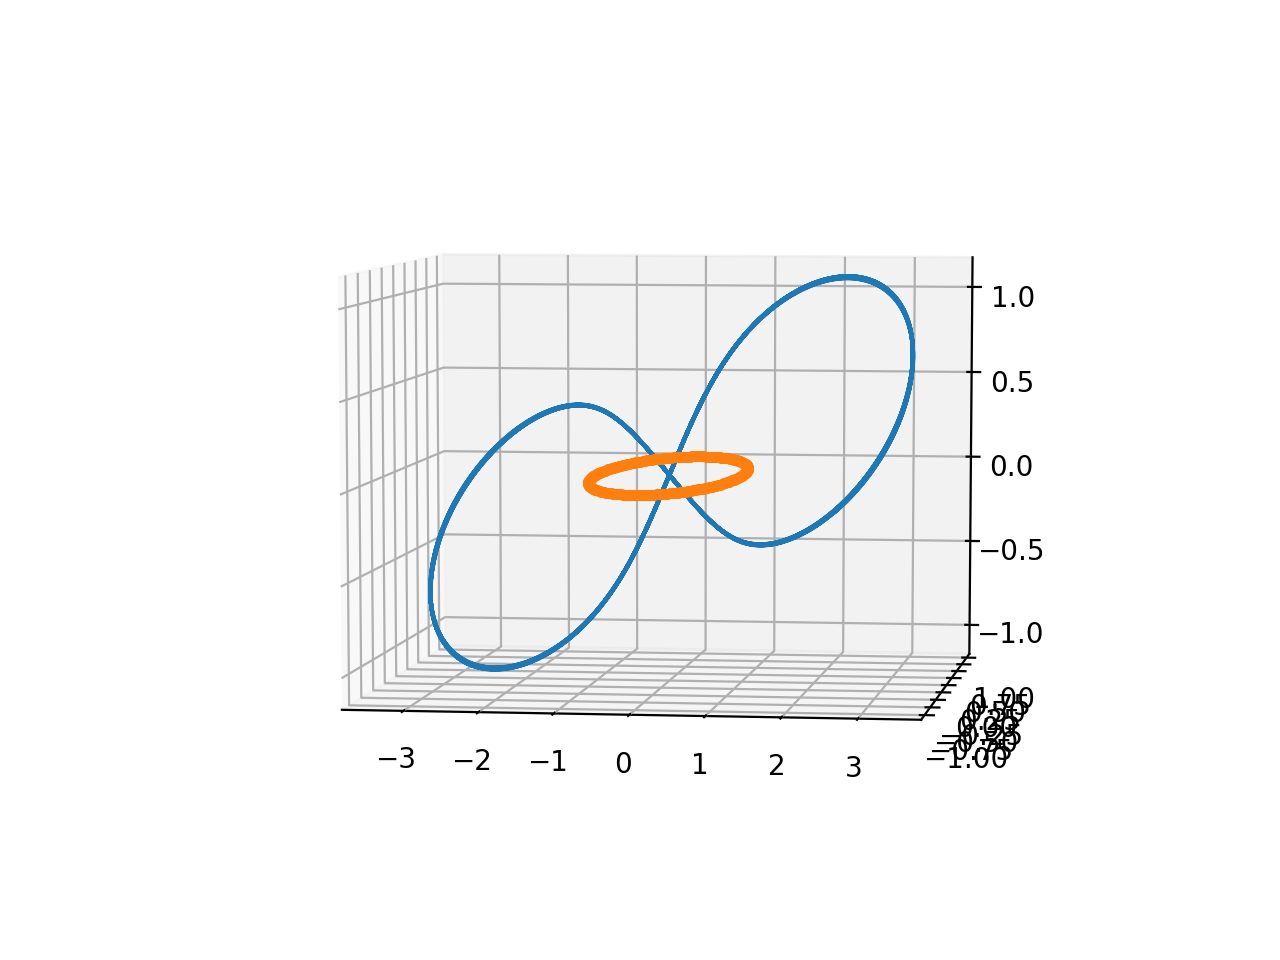

In [344]:
planeta.numero = 200
planeta.crear()

vo=1.195
angulo=np.pi/4

luna.x=0
luna.y=0
luna.z=0
luna.vx=vo*np.sin(angulo)
luna.vy=0
luna.vz=vo*np.cos(angulo)

xa,ya,za=run(luna,planeta,dt=0.05,N=5000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')

<IPython.core.display.Javascript object>


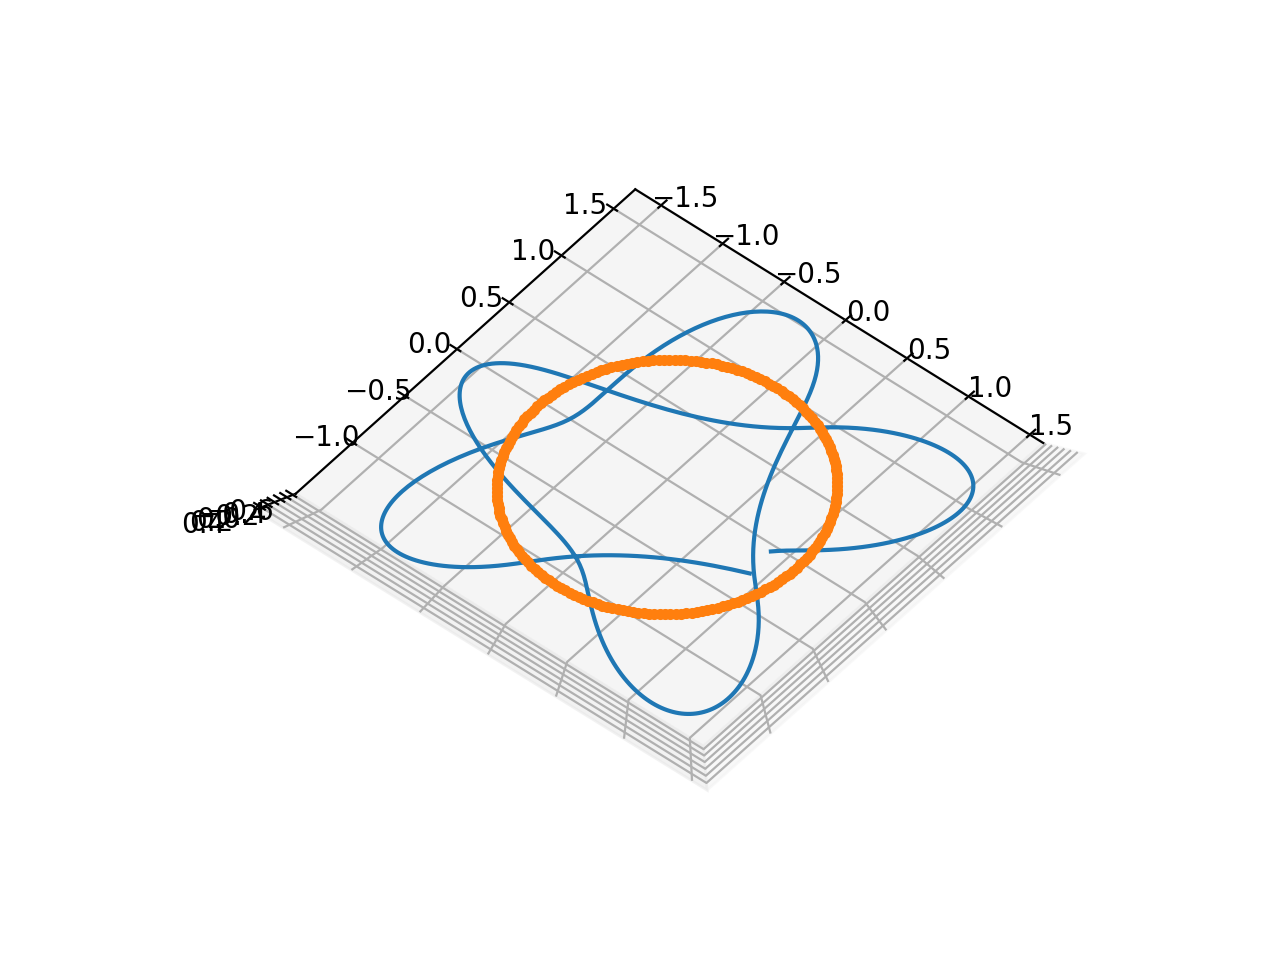

In [360]:
planeta.numero = 200
planeta.crear()

vo=1.2
angulo=np.pi/4
angulo2=0.8*np.pi/4

luna.x=0.8
luna.y=0
luna.z=0
luna.vx=vo*np.sin(angulo)*np.sin(angulo2)
luna.vy=vo*np.sin(angulo)*np.cos(angulo2)
luna.vz=vo*np.cos(angulo)

xa,ya,za=run(luna,planeta,dt=0.05,N=500)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya,za)
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')

<IPython.core.display.Javascript object>


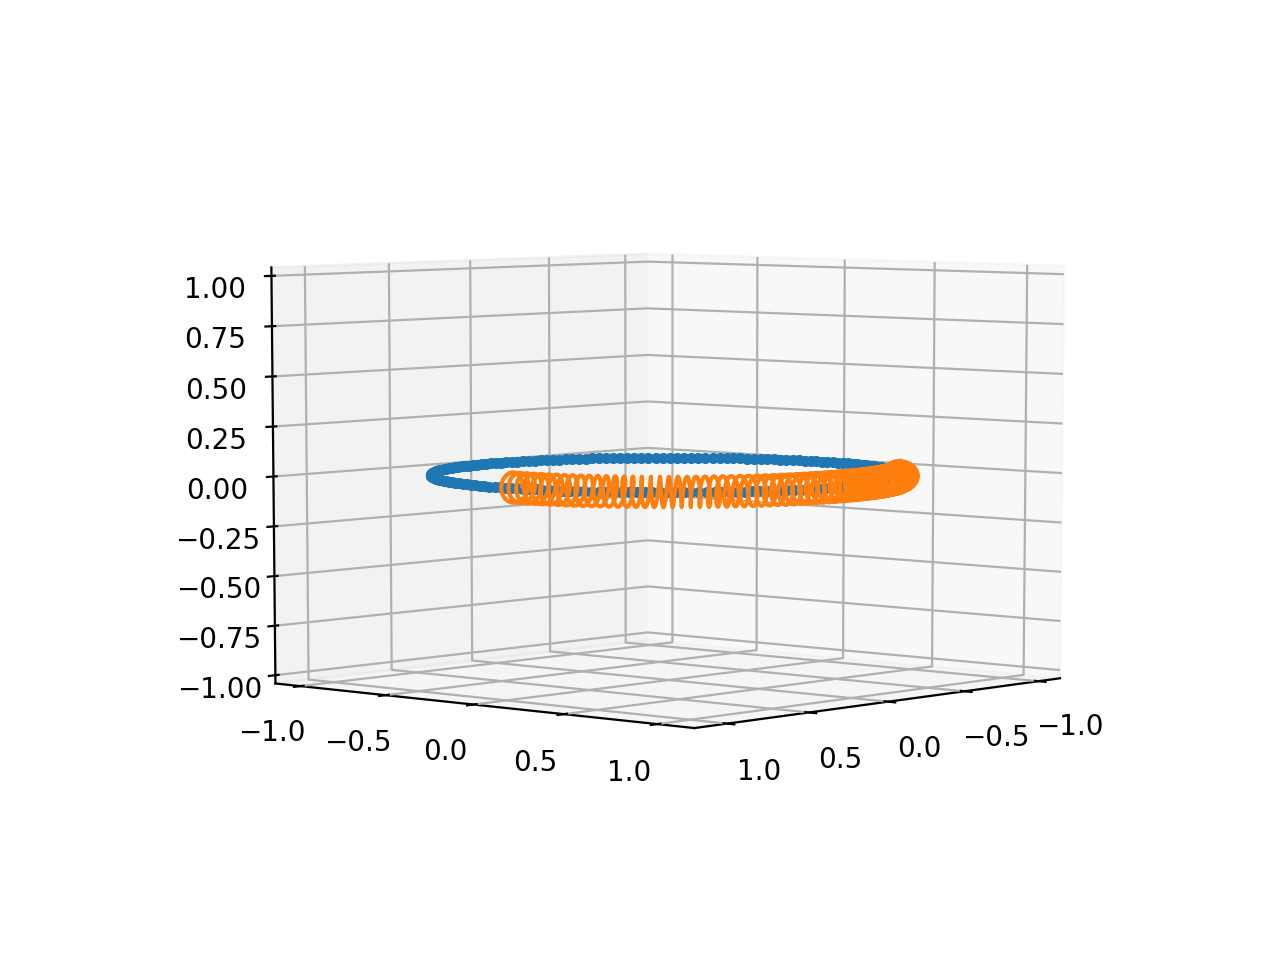

(-1, 1)

In [393]:
planeta.numero = 200
planeta.crear()

vo=0.45255

luna.x=0.9
luna.y=0
luna.z=0
luna.vx=0
luna.vy=vo*0.1
luna.vz=vo

xa,ya,za=run(luna,planeta,dt=0.005,N=10000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(planeta.xcoord,planeta.ycoord,marker='.',linestyle='')
ax.plot(xa, ya,za)
ax.set_zlim(-1,1)